In [9]:
import numpy as np
import h5py
from WDMWaveletTransforms.wavelet_transforms import transform_wavelet_time
import matplotlib.pyplot as plt


In [10]:
with h5py.File("LDC2_spritz_mbhb1_training_v1.h5", "r") as f:
    for group in f.keys():
        print(f"\n[{group}]")
        # inquire group
        for dataset in f[group]:
            print(f"  Dataset: {dataset}")
            # inquire dataset
            for attr in f[group][dataset].attrs:
                print(f"    Attribute: {attr} = {f[group][dataset].attrs[attr]}")



[clean]
  Dataset: tdi
    Attribute: coord = t
    Attribute: dt = 5.0
    Attribute: t0 = 8899200.0
    Attribute: units = dimensionless

[header]
  Dataset: date

[instru]
  Dataset: config

[noisefree]
  Dataset: tdi
    Attribute: coord = t
    Attribute: dt = 5.0
    Attribute: t0 = 8899200.0
    Attribute: units = dimensionless

[obs]
  Dataset: config
  Dataset: tdi
    Attribute: coord = t
    Attribute: dt = 5.0
    Attribute: t0 = 8899200.0
    Attribute: units = dimensionless

[sky]
  Dataset: cat
    Attribute: CoalescenceTime = s
    Attribute: Distance = Mpc
    Attribute: EclipticLatitude = rad
    Attribute: EclipticLongitude = rad
    Attribute: Inclination = rad
    Attribute: InitialAzimuthalAngleL = rad
    Attribute: InitialPolarAngleL = rad
    Attribute: Mass1 = Msun
    Attribute: Mass2 = Msun
    Attribute: PhaseAtCoalescence = rad
    Attribute: PolarAngleOfSpin1 = rad
    Attribute: PolarAngleOfSpin2 = rad
    Attribute: Polarization = rad
    Attribute: Re

In [14]:
# read h5
filename = "LDC2_spritz_mbhb1_training_v1.h5"
with h5py.File(filename, "r") as f:
    data = f["noisefree/tdi"][:]
dt = 5 # time step

In [12]:
# extract t, X, Y, Z
t_data = data['t']
x_data = data['X']
y_data = data['Y']
z_data = data['Z']

# calculate amplitude
h = np.sqrt(x_data**2 + y_data**2 + z_data**2).flatten()

Nf = 160 # number of freq
Nt = int(len(data)/Nf) # number of time windows


In [13]:
# do wavelet transform
wave = transform_wavelet_time(h, Nf=Nf, Nt=Nt,nx=8.,mult=4)


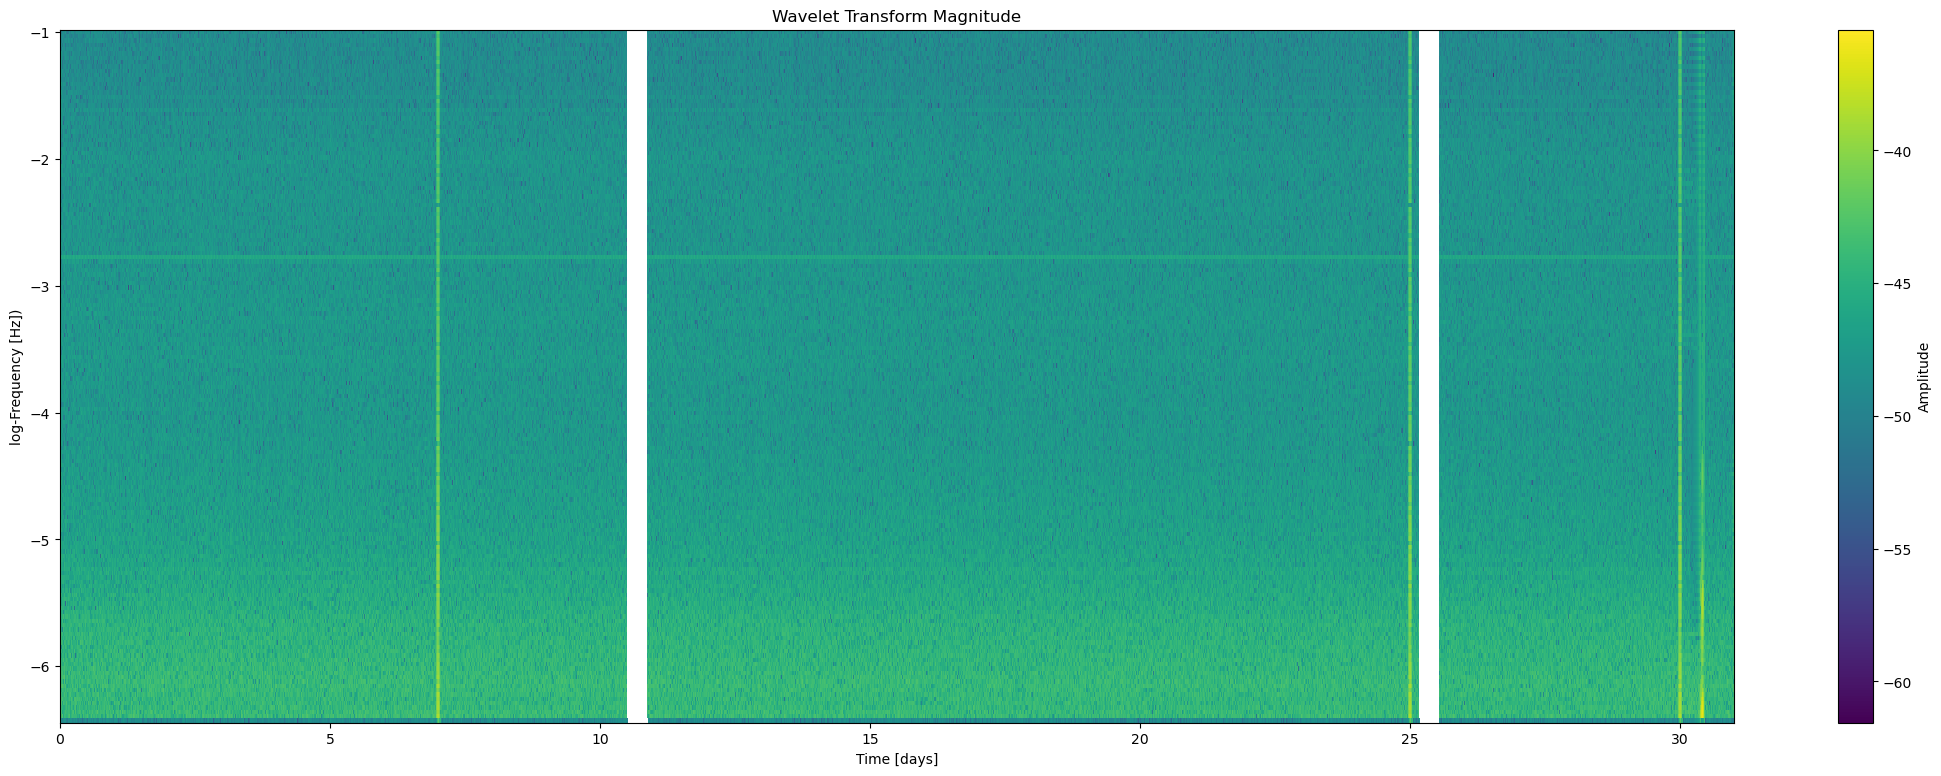

In [21]:
time_step = Nf * dt  # time window step length
total_time = Nt * time_step

# range of f in wavelet space
fmax = 1 / (dt*2)  # Nyquist frequency
fmin = 1 / (total_time)

# take logarithm
freqs = np.logspace(np.log10(fmin), np.log10(fmax), Nf)

# seconds -> days
time_day = np.arange(Nt) * (time_step / 86400)  

# make mesh
T, F = np.meshgrid(time_day, freqs)

plt.figure(figsize=(27, 9))
plt.pcolormesh(T, np.log10(F), np.log10((wave.T)**2), shading='auto', cmap='viridis')
plt.xlabel('Time [days]')
plt.ylabel('log-Frequency [Hz])')
plt.title('Wavelet Transform Magnitude')
plt.colorbar(label='Amplitude')
plt.show()

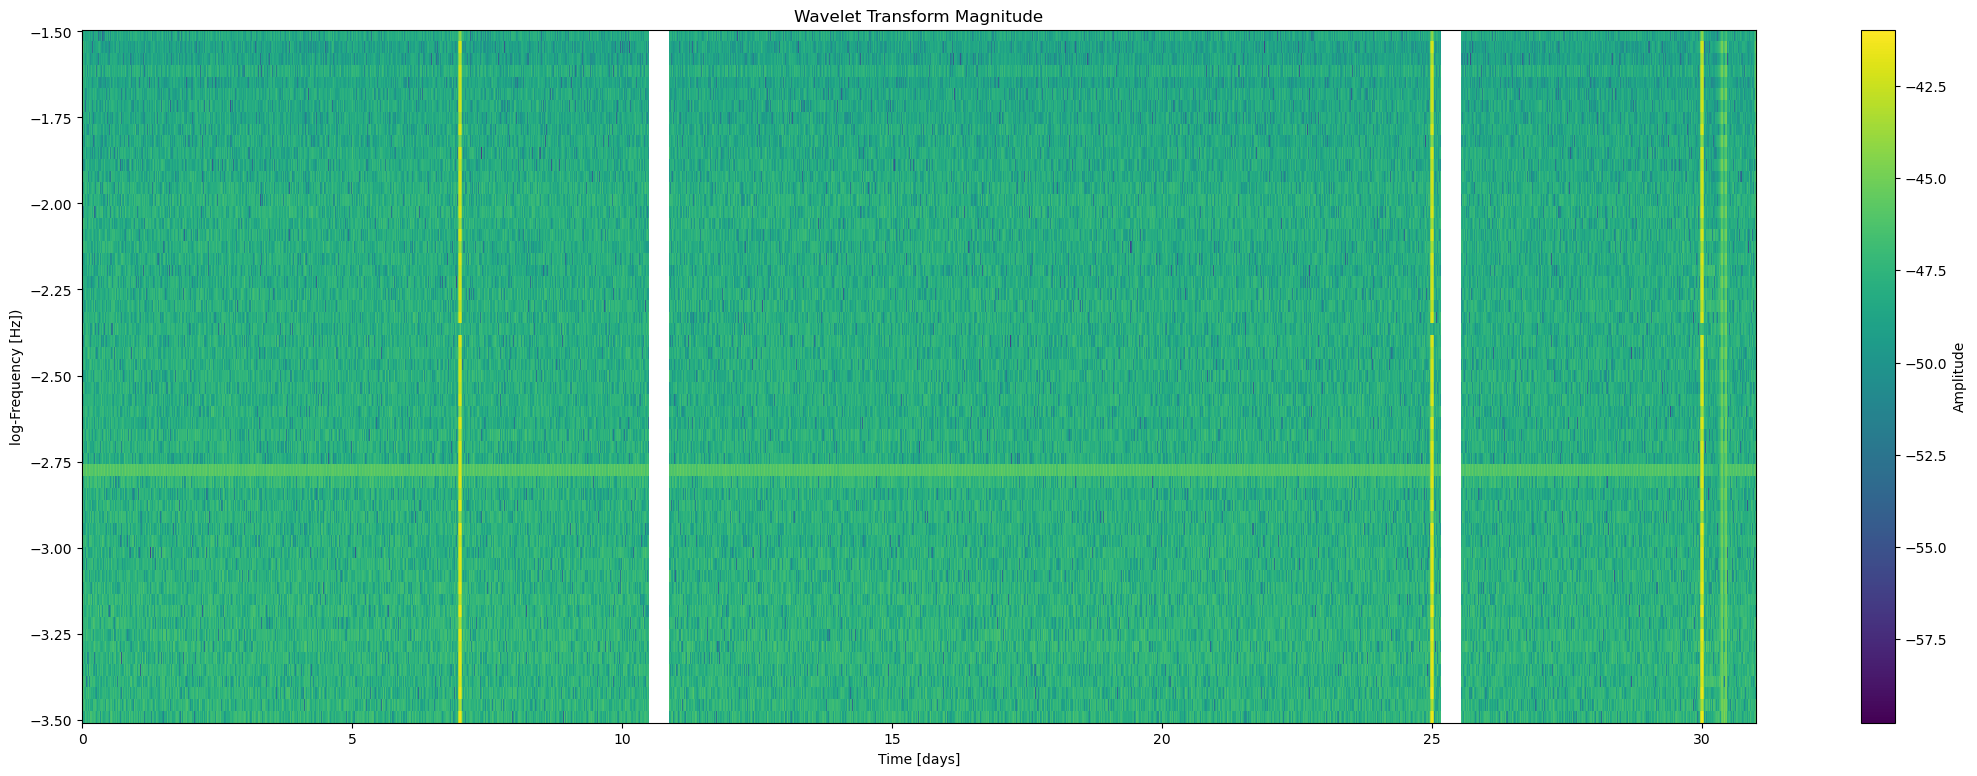

In [22]:
# select trustable freq range
freq_min = 10**-3.5
freq_max = 10**-1.5
freq_mask = (freqs >= freq_min) & (freqs <= freq_max)
freqs_selected = freqs[freq_mask]
wave_selected = wave[:, freq_mask]  

T, F = np.meshgrid(time_day, freqs_selected)

plt.figure(figsize=(27, 9))
plt.pcolormesh(T, np.log10(F), np.log10((wave_selected.T)**2), shading='auto', cmap='viridis')
plt.xlabel('Time [days]')
plt.ylabel('log-Frequency [Hz])')
plt.title('Wavelet Transform Magnitude')
plt.colorbar(label='Amplitude')
plt.show()
